- Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.


In [1]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#premier_df = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\premier_league.csv', sep=',')
premier_df = pd.read_csv('C:\\Users\\formacio\\Gabriel De Santis\\Datasets\\premier_league.csv', sep=',')
premier_df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [5]:
premier_df.shape

(571, 59)

In [6]:
premier_df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [7]:
premier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [8]:
premier_df.isna().sum() / len(premier_df) * 100

Name                       0.000000
Jersey Number              1.401051
Club                       0.000000
Position                   0.000000
Nationality                0.175131
Age                        0.175131
Appearances                0.000000
Wins                       0.000000
Losses                     0.000000
Goals                      0.000000
Goals per match           45.884413
Headed goals              12.084063
Goals with right foot     12.084063
Goals with left foot      12.084063
Penalties scored          45.884413
Freekicks scored          45.884413
Shots                     45.884413
Shots on target           45.884413
Shooting accuracy %       45.884413
Hit woodwork              12.084063
Big chances missed        45.884413
Clean sheets              54.115587
Goals conceded            54.115587
Tackles                   12.084063
Tackle success %          31.698774
Last man tackles          66.199650
Blocked shots             12.084063
Interceptions             12

Mostra aleatòria simple del 20%:

In [9]:
premier_df.sample(frac=0.2)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
550,John Ruddy,21.0,Wolverhampton-Wanderers,Goalkeeper,England,33.0,119,33,54,0,...,51.0,175.0,76.0,69.0,484.0,1098.0,3,1,1,NaN
225,Aleksandar Mitrovic,9.0,Fulham,Forward,Serbia,26.0,79,17,46,23,...,NaN,NaN,NaN,NaN,NaN,NaN,12,2,117,51.0
545,Jarrod Bowen,20.0,West-Ham-United,Forward,England,23.0,22,4,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,8,1.0
263,Daniel Amartey,18.0,Leicester-City,Defender,Ghana,25.0,46,17,19,1,...,NaN,NaN,NaN,NaN,NaN,NaN,5,1,41,1.0
463,Alfie Whiteman,41.0,Tottenham-Hotspur,Goalkeeper,England,21.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Jeffrey Schlupp,15.0,Crystal-Palace,Midfielder,Ghana,27.0,148,56,61,11,...,NaN,NaN,NaN,NaN,NaN,NaN,15,0,109,3.0
506,Matt Phillips,10.0,West-Bromwich-Albion,Midfielder,Scotland,29.0,110,28,55,10,...,NaN,NaN,NaN,NaN,NaN,NaN,6,0,57,20.0
358,Luke Shaw,23.0,Manchester-United,Defender,England,25.0,157,68,39,1,...,NaN,NaN,NaN,NaN,NaN,NaN,29,1,138,7.0
88,Aaron Connolly,7.0,Brighton-and-Hove-Albion,Forward,Ireland,20.0,26,8,12,4,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,17,16.0


Mostra sistemàtica de aprox. el 20% (no és exacte degut a que és necessari arrodonir l'interval):

In [67]:
size_sample = round(len(premier_df) * 0.2)

starting_point = random.randint(0, len(premier_df)-size_sample)

interval = round(len(premier_df[starting_point:]) / size_sample)

premier_df[starting_point::interval]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
7,Rob Holding,16.0,Arsenal,Defender,England,25.0,41,25,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,32,0.0
12,Gabriel Magalhães,6.0,Arsenal,Defender,Brazil,22.0,2,2,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,0.0
17,Joseph Willock,28.0,Arsenal,Midfielder,England,21.0,33,12,12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,13,0.0
22,Dani Ceballos,8.0,Arsenal,Midfielder,Spain,24.0,26,14,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,21,0.0
27,Eddie Nketiah,30.0,Arsenal,Forward,England,21.0,23,12,8,4,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,18,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,Xande Silva,32.0,West-Ham-United,Forward,Portugal,23.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
552,Conor Coady,16.0,Wolverhampton-Wanderers,Defender,England,27.0,79,33,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,10,0,28,0.0
557,Marçal,5.0,Wolverhampton-Wanderers,Defender,Brazil,31.0,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0.0
562,João Moutinho,28.0,Wolverhampton-Wanderers,Midfielder,Portugal,34.0,78,32,23,2,...,NaN,NaN,NaN,NaN,NaN,NaN,11,0,95,3.0


- Exercici 2
Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

Per fer la mostra estratificada seleccionarem la variable posició dels jugadors com a label a partir de la qual prendre la mostra. Les features que hem seleccionat son nom, victòries y derrotes.

In [68]:
premier_df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [69]:
premier = premier_df[['Name', 'Position', 'Wins', 'Losses']].copy(deep=True)
premier

,Name,Position,Wins,Losses
0,Bernd Leno,Goalkeeper,28,16
1,Matt Macey,Goalkeeper,0,0
2,Rúnar Alex Rúnarsson,Goalkeeper,0,0
3,Héctor Bellerín,Defender,90,37
4,Kieran Tierney,Defender,7,5
...,...,...,...,...
566,Pedro Neto,Forward,14,7
567,Raúl Jiménez,Forward,32,23
568,Adama Traoré,Forward,27,47
569,Fábio Silva,Forward,0,1


In [70]:
y = premier.Position
y.head()

0    Goalkeeper
1    Goalkeeper
2    Goalkeeper
3      Defender
4      Defender
Name: Position, dtype: object

In [71]:
y.shape

(571,)

In [72]:
y.value_counts() / len(y) *100

Midfielder    34.676007
Defender      33.975482
Forward       19.264448
Goalkeeper    12.084063
Name: Position, dtype: float64

<AxesSubplot:xlabel='Position', ylabel='count'>

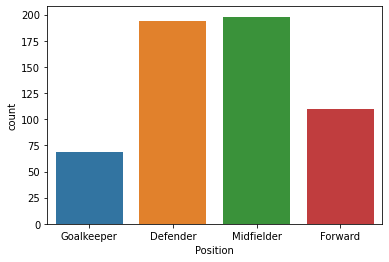

In [82]:
sns.countplot(x=y,order=['Goalkeeper', 'Defender', 'Midfielder', 'Forward'])

In [75]:
X = premier[['Name', 'Wins', 'Losses']]
X.head()

,Name,Wins,Losses
0,Bernd Leno,28,16
1,Matt Macey,0,0
2,Rúnar Alex Rúnarsson,0,0
3,Héctor Bellerín,90,37
4,Kieran Tierney,7,5


In [76]:
X.shape

(571, 3)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [78]:
y_test.head()

44     Midfielder
246    Midfielder
570       Forward
431    Midfielder
377       Forward
Name: Position, dtype: object

In [79]:
y_test.value_counts() / len(y_test) *100

Midfielder    34.965035
Defender      34.265734
Forward       18.881119
Goalkeeper    11.888112
Name: Position, dtype: float64

<AxesSubplot:xlabel='Position', ylabel='count'>

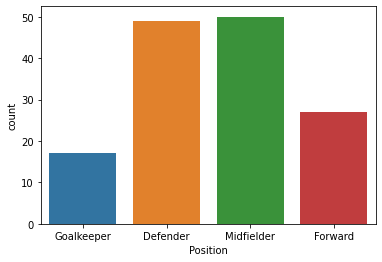

In [81]:
sns.countplot(x=y_test, order=['Goalkeeper', 'Defender', 'Midfielder', 'Forward'])

In [83]:
X_test.head()

,Name,Wins,Losses
44,Douglas Luiz,10,20
246,Jamie Shackleton,0,1
570,Leonardo Campana,0,0
431,Zak Brunt,0,0
377,Mason Greenwood,14,10


Com es pot observar, la mostra estratificada ha sigut exitosa, ja que hem aconseguit mantenir la proporció de cada subgrup (porter, defensor, etc.) en la mostra.

A continuació, procedirem a realitzar l'SMOTE.

En quant a l'imbalance, hem considerat oportú dividir la mostra entre jugadors de camp i porters.

In [84]:
premier['De_campo'] = [0 if x == 'Goalkeeper' else 1 for x in premier.Position]
premier.head()

,Name,Position,Wins,Losses,De_campo
0,Bernd Leno,Goalkeeper,28,16,0
1,Matt Macey,Goalkeeper,0,0,0
2,Rúnar Alex Rúnarsson,Goalkeeper,0,0,0
3,Héctor Bellerín,Defender,90,37,1
4,Kieran Tierney,Defender,7,5,1


In [85]:
premier.De_campo.value_counts()

1    502
0     69
Name: De_campo, dtype: int64

<AxesSubplot:xlabel='De_campo', ylabel='count'>

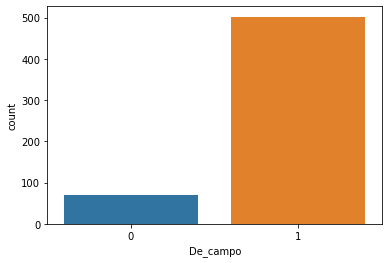

In [86]:
sns.countplot(data=premier, x='De_campo')

In [88]:
sm = SMOTE()
X = premier[['Wins', 'Losses']]
y = premier.De_campo
X_trained, y_trained = sm.fit_resample(X, y)

In [89]:
X_trained

,Wins,Losses
0,28,16
1,0,0
2,0,0
3,90,37
4,7,5
...,...,...
999,30,23
1000,0,0
1001,0,0
1002,0,0


In [90]:
y_trained

0       0
1       0
2       0
3       1
4       1
       ..
999     0
1000    0
1001    0
1002    0
1003    0
Name: De_campo, Length: 1004, dtype: int64

<AxesSubplot:xlabel='De_campo', ylabel='count'>

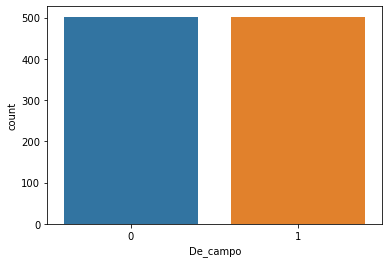

In [91]:
sns.countplot(x=y_trained)

Com podem observar, l'SMOTE ha balancejat el desequilibri que hi havia entre jugadors de camp i porters.

- Exercici 3
Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

Realitzarem una mostra del 20%, és a dir, de 114 files

In [95]:
size_sample

114

In [96]:
#stream = premier
#size_sample: variable que ya teníamos desde antes (20% de la población)
reservoir = pd.DataFrame(columns=['Name', 'Position', 'Wins', 'Losses', 'De_campo'], index=range(0, size_sample))
reservoir.head()

,Name,Position,Wins,Losses,De_campo
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [97]:
len(reservoir)

114

In [98]:
len(premier)

571

In [99]:
for i in range(0, len(premier)):
    if i + 1 <= len(reservoir):
        reservoir.iloc[i, :] = premier.iloc[i, :]
    else:
        probability = len(reservoir)/(i+1)
        if random.random() < probability:
            reservoir.iloc[random.choice(range(0, len(reservoir))), :] = premier.iloc[i, :]
reservoir

,Name,Position,Wins,Losses,De_campo
0,Matthew Longstaff,Midfielder,2,4,1
1,Harvey Barnes,Midfielder,26,21,1
2,Felipe Anderson,Midfielder,20,32,1
3,Alex Oxlade-Chamberlain,Midfielder,114,41,1
4,Leander Dendoncker,Midfielder,26,15,1
...,...,...,...,...,...
109,Ashley Westwood,Midfielder,65,106,1
110,Alex Iwobi,Forward,59,41,1
111,Dennis Cirkin,Defender,0,0,1
112,Bruno Fernandes,Midfielder,9,1,1
